In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

In [2]:
# Import necessary libraries
import networkx as nx
from core.neuron import Neuron, Synapse
from core.brain import Brain

# Create some neurons
neuron1 = Neuron(
    id="neuron1",
    args={"prompt": "Hello, Neuron 1!"},
    predecessors={},
    is_terminal=False,
    is_entrypoint=True
)

neuron2 = Neuron(
    id="neuron2",
    args={"prompt": "Hello, Neuron 2!"},
    predecessors={},
    is_terminal=False
)

neuron25 = Neuron(
    id="neuron2.5",
    args={"prompt": "Hello, Neuron 2.5!"},
    predecessors={},
    is_terminal=False
)

neuron3 = Neuron(
    id="neuron3",
    args={"prompt": "Hello, Neuron 3!"},
    predecessors={},
    is_terminal=True
)

In [3]:
# Create some synapses
synapse1 = Synapse(sender_neuron_id="neuron1", receiver_neuron_id="neuron2")
synapse15 = Synapse(sender_neuron_id="neuron1", receiver_neuron_id="neuron2.5")
synapse2 = Synapse(sender_neuron_id="neuron2", receiver_neuron_id="neuron3")
synapse3 = Synapse(sender_neuron_id="neuron2.5", receiver_neuron_id="neuron3")

In [4]:
# Create a brain and add neurons and synapses
brain = Brain(name="TestBrain")
brain.add_neuron(neuron1)
brain.add_neuron(neuron2)
brain.add_neuron(neuron25)
brain.add_neuron(neuron3)

brain.add_synapse(synapse1)
brain.add_synapse(synapse15)
brain.add_synapse(synapse2)
brain.add_synapse(synapse3)

/home/golympie/miniconda3/lib/python3.11/site-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `bool` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


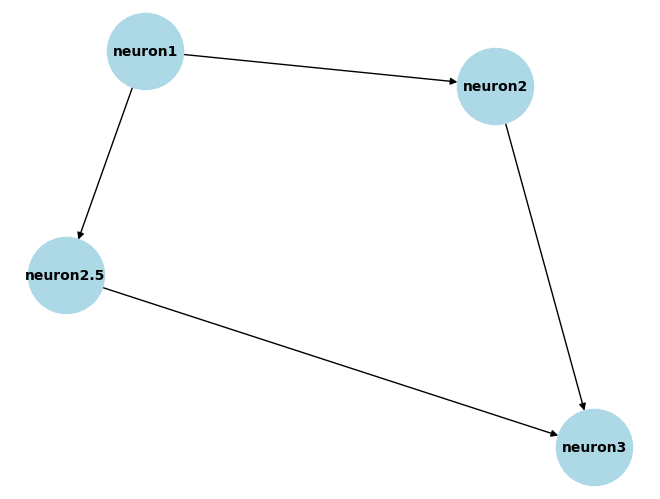

In [5]:
# Display the brain graph
pos = nx.spring_layout(brain.graph)
nx.draw(brain.graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

In [6]:
messages=[]
stream = brain.run(messages)

for msg in stream:
    print(msg)

id='4d257445-0352-49c1-99bd-1b13aef3ae6e' emitter_id='neuron1' args={'prompt': 'Hello, Neuron 1!'} reply={'content': 'ran'} persistant=False
id='30afa918-1644-4b6a-a8a8-222e7b7d4799' emitter_id='neuron2' args={'prompt': 'Hello, Neuron 2!'} reply={'content': 'ran'} persistant=False
id='2e92e51e-65ff-4f90-a2fa-cea3bb946ace' emitter_id='neuron2.5' args={'prompt': 'Hello, Neuron 2.5!'} reply={'content': 'ran'} persistant=False
id='c478e32b-019d-48ee-acb2-080acbf4b7aa' emitter_id='neuron3' args={'prompt': 'Hello, Neuron 3!'} reply={'content': 'ran'} persistant=False


In [7]:
brain.save_config('brain_config.yaml')

/home/golympie/miniconda3/lib/python3.11/site-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `bool` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
